In [1]:
import numpy as np
import pandas as pd

In [2]:
url_movies = "C:/Users/DELL/Documents/MBD/nosql/movie_ratings.csv"

In [17]:
df_movies = pd.read_csv(url_movies) 

In [18]:
df_movies.shape

(3236, 7)

In [19]:
df_movies.head(10)

,num,movie,year,imdb,metascore,votes,n_imdb
0,0,Gladiator,2000.0,8.5,67.0,1454672.0,85.0
1,1,Memento,2000.0,8.4,80.0,1207642.0,84.0
2,2,Snatch,2000.0,8.3,55.0,837041.0,83.0
3,3,Requiem for a Dream,2000.0,8.3,68.0,821268.0,83.0
4,4,X-Men,2000.0,7.3,64.0,604615.0,73.0
5,5,Cast Away,2000.0,7.8,73.0,576272.0,78.0
6,6,American Psycho,2000.0,7.6,64.0,569614.0,76.0
7,7,Unbreakable,2000.0,7.3,62.0,411161.0,73.0
8,8,Mission: Impossible II,2000.0,6.1,59.0,334574.0,61.0
9,9,Meet the Parents,2000.0,7.0,73.0,329802.0,70.0


In [20]:
print(df_movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3236 entries, 0 to 3235
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   num        3236 non-null   object 
 1   movie      3196 non-null   object 
 2   year       3196 non-null   float64
 3   imdb       3196 non-null   float64
 4   metascore  3196 non-null   float64
 5   votes      3196 non-null   float64
 6   n_imdb     3196 non-null   float64
dtypes: float64(5), object(2)
memory usage: 177.1+ KB
None


In [21]:
df_movies.isnull().sum()

num           0
movie        40
year         40
imdb         40
metascore    40
votes        40
n_imdb       40
dtype: int64

In [22]:
df_movies.dropna(inplace=True)
df_movies.isnull().sum()

num          0
movie        0
year         0
imdb         0
metascore    0
votes        0
n_imdb       0
dtype: int64

In [23]:
df_movies.shape

(3196, 7)

In [24]:
df_movies.describe()

,year,imdb,metascore,votes,n_imdb
count,3196.000000,3196.000000,3196.000000,3.196000e+03,3196.000000
mean,2008.429287,7.125282,63.493116,3.909708e+05,71.252816
std,5.168552,0.730750,15.586267,2.686944e+05,7.307503
min,2000.000000,4.100000,24.000000,1.133510e+05,41.000000
25%,2004.000000,6.600000,52.000000,2.255040e+05,66.000000
50%,2008.000000,7.200000,64.000000,3.011300e+05,72.000000
75%,2013.000000,7.700000,75.000000,4.746230e+05,77.000000
max,2017.000000,9.000000,100.000000,2.558708e+06,90.000000


In [34]:
df_movies['year'].unique()

array([2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008.,
       2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017.])

In [37]:
df_movies.describe().loc[['min', 'max'], ['imdb', 'metascore']]

,imdb,metascore
min,4.1,24.0
max,9.0,100.0


In [38]:
df_movies['n_imdb'] = df_movies['imdb'] * 10
df_movies.head(3)

,num,movie,year,imdb,metascore,votes,n_imdb
0,0,Gladiator,2000.0,8.5,67.0,1454672.0,85.0
1,1,Memento,2000.0,8.4,80.0,1207642.0,84.0
2,2,Snatch,2000.0,8.3,55.0,837041.0,83.0


In [40]:
df_movies.to_csv('movie_ratings2.csv')

In [25]:
from pandas.plotting import scatter_matrix

In [26]:
import matplotlib.pyplot as plt

In [27]:
import seaborn as sns

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

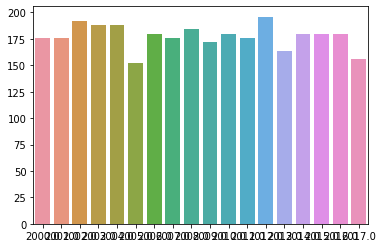

In [43]:
y=df_movies['year'].value_counts()
sns.barplot(y.index,y.values)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


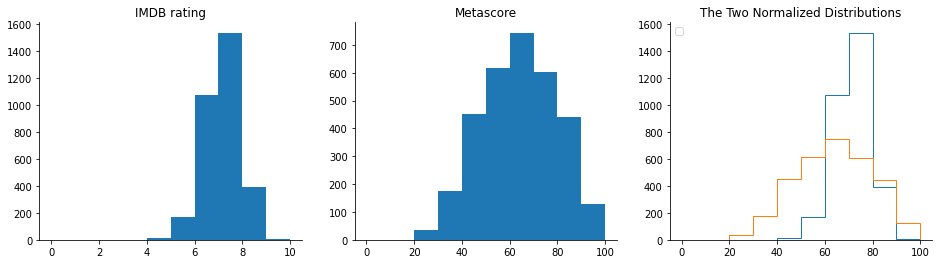

In [42]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))
ax1, ax2, ax3 = fig.axes
ax1.hist(df_movies['imdb'], bins = 10, range = (0,10)) # bin range = 1
ax1.set_title('IMDB rating')
ax2.hist(df_movies['metascore'], bins = 10, range = (0,100)) # bin range = 10
ax2.set_title('Metascore')
ax3.hist(df_movies['n_imdb'], bins = 10, range = (0,100), histtype = 'step')
ax3.hist(df_movies['metascore'], bins = 10, range = (0,100), histtype = 'step')
ax3.legend(loc = 'upper left')
ax3.set_title('The Two Normalized Distributions')
for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.show()